# Imports

Started up by running `shawnhammer` in a terminal. Running on slot 4, /home/cryo/docker/pysmurf/dev/v5.0.2, rogue version /home/cryo/docker/smurf/stable/slotN/v5.0.2, and experiment cfg cfg_files/b33/experiment_b33_lbhb.cfg. pysmurf branch b33_setup&issue658.  `shawnhammer` already runs `setup()`, so no need to run here.

In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import yaml
import time
import pickle as pkl
import os
import numpy as np
from matplotlib import cm
from scipy.signal import welch,periodogram
import pandas as pd
import glob
from scipy.optimize import curve_fit

import pysmurf.client
import matplotlib.pylab as plt
import numpy as np
import sys
import os
epics_prefix="smurf_server_s4"
config_file=os.path.abspath("/usr/local/src/pysmurf/cfg_files/b33/experiment_b33_lbhb.cfg")
S = pysmurf.client.SmurfControl(epics_root=epics_prefix,cfg_file=config_file,setup=False,make_logfile=False,shelf_manager="shm-smrf-sp01")

In [11]:
from scipy import signal

## Try single tone first

In [25]:
S.setup()

[ 2022-02-15 00:38:13 ]  Setting up...
[ 2022-02-15 00:38:13 ]  Toggling DACs
[ 2022-02-15 00:38:13 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:DBG:dacReset[0] 1
[ 2022-02-15 00:38:13 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:DBG:dacReset[1] 1
[ 2022-02-15 00:38:13 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[1]:DBG:dacReset[0] 1
[ 2022-02-15 00:38:13 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[1]:DBG:dacReset[1] 1
[ 2022-02-15 00:38:13 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:DBG:dacReset[0] 0
[ 2022-02-15 00:38:13 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:DBG:dacReset[1] 0
[ 2022-02-15 00:38:13 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[1]:DBG:dacReset[0] 0
[ 2022-02-15 00:38:13 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore

/usr/local/lib/python3.6/dist-packages/epics/ca.py:1507: UserWarning: ca.get('smurf_server_s4:AMCc:SmurfApplication:ConfiguringInProgress') timed out after 0.96 seconds.
  warnings.warn(msg % (name(chid), timeout))


[ 2022-02-15 00:39:44 ]  caget smurf_server_s4:AMCc:SmurfApplication:ConfiguringInProgress
[ 2022-02-15 00:39:54 ]  caget smurf_server_s4:AMCc:SmurfApplication:ConfiguringInProgress
[ 2022-02-15 00:40:04 ]  caget smurf_server_s4:AMCc:SmurfApplication:ConfiguringInProgress
[ 2022-02-15 00:40:14 ]  caget smurf_server_s4:AMCc:SmurfApplication:ConfiguringInProgress
[ 2022-02-15 00:40:22 ]  False
[ 2022-02-15 00:40:22 ]  caget smurf_server_s4:AMCc:SmurfApplication:SystemConfigured
[ 2022-02-15 00:40:22 ]  True
[ 2022-02-15 00:40:22 ]  System configuration finished after 102 seconds. The final state was True.
[ 2022-02-15 00:40:22 ]  caget smurf_server_s4:AMCc:SmurfApplication:SmurfVersion
[ 2022-02-15 00:40:22 ]  5.0.2
[ 2022-02-15 00:40:22 ]  caget smurf_server_s4:AMCc:SmurfApplication:JesdStatus
[ 2022-02-15 00:40:22 ]  Locked
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[0]:iqSwapIn 0
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:Fp

[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[6]:CryoChannels:gradientDescentBeta 0.0
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[6]:CryoChannels:etaScanAverages 1
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[6]:CryoChannels:etaScanDelF 5000
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[7]:iqSwapIn 0
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[7]:iqSwapOut 0
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[7]:refPhaseDelay 6
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[7]:refPhaseDelayFine 0
[ 2022-02-15 00:40:22 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[7]:lmsDelay 24
[ 2022-02-15 00:40:22 ]  caput smurf_se

[ 2022-02-15 00:40:48 ]  {'hemt_Vg': 0.48999935999999994, 'hemt_Id': 0.03866812499999997, '50K_Vg': -0.74999624, '50K_Id': 0.0}
[ 2022-02-15 00:40:48 ]  {'hemt_Vg': 0.48999935999999994, 'hemt_Id': 0.032222812499999975, '50K_Vg': -0.74999624, '50K_Id': 0.0}
[ 2022-02-15 00:40:48 ]  Cryocard temperature = 24.10365513392857
[ 2022-02-15 00:40:48 ]  Configuring the system to take timing from ext_ref
[ 2022-02-15 00:40:48 ]  Select external reference for bay 0
[ 2022-02-15 00:40:53 ]  smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:SelExtRef sent
[ 2022-02-15 00:40:53 ]  Select external reference for bay 1
[ 2022-02-15 00:40:58 ]  smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[1]:SelExtRef sent
[ 2022-02-15 00:40:58 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:RtmCryoDet:RampStartMode 0
[ 2022-02-15 00:40:58 ]  Done with setup.


True

In [26]:
S.set_fixed_tone(4249.75,13)

(0, 0)

well that looks kind of awful on the SA. what does it look like on the ADC?

[ 2022-02-15 00:41:10 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:DaqMuxV2[0]:DataBufferSize 524288
[ 2022-02-15 00:41:10 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:DebugSelect[0] 0
[ 2022-02-15 00:41:11 ]  ADC plot saved to /data/smurf_data/20220214/1644882863/plots/1644885670_adc0.png
[ 2022-02-15 00:41:11 ]  Saving raw adc data to /data/smurf_data/20220214/1644882863/outputs/1644885670_adc0


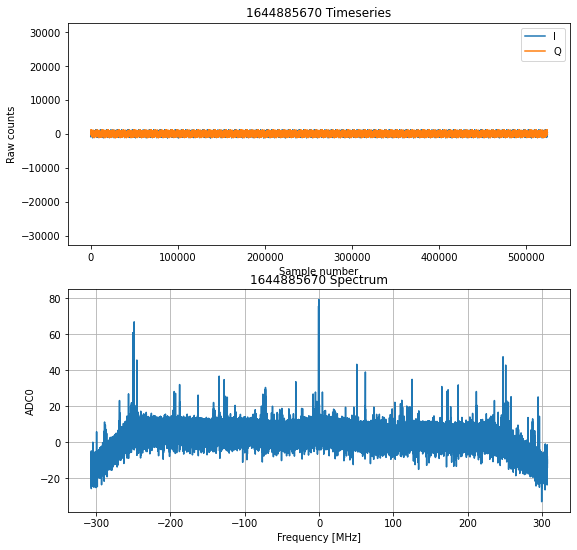

In [27]:
dat = S.read_adc_data(0,make_plot=True,save_data=True)

In [6]:
# what's in this thing?
dat

array([-141. +40.j, -290. +87.j,  -92. +56.j, ...,   -7.+775.j,
         14.+898.j,  172.+759.j])

(-5.0, 5.0)

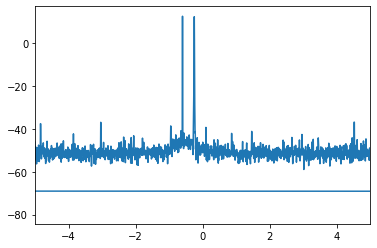

In [18]:
f, pxx = signal.welch(dat, fs=S.get_digitizer_frequency_mhz() * 1e6,nperseg=2**17, return_onesided=False, detrend=False)
plt.plot(f*1e-6, 10*np.log10(pxx))
plt.xlim([-5,5])

In [28]:
for band in np.arange(8):
    S.band_off(band)

In [29]:
S.set_fixed_tone(4100,13)

(0, 387)

In [30]:
dat = S.read_adc_data(0,make_plot=False)
f, pxx = signal.welch(dat, fs=S.get_digitizer_frequency_mhz() * 1e6,nperseg=2**17, return_onesided=False, detrend=False)

[ 2022-02-15 00:42:03 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:DaqMuxV2[0]:DataBufferSize 524288
[ 2022-02-15 00:42:03 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:DebugSelect[0] 0
[ 2022-02-15 00:42:04 ]  Saving raw adc data to /data/smurf_data/20220214/1644882863/outputs/1644885723_adc0


(-175.0, -125.0)

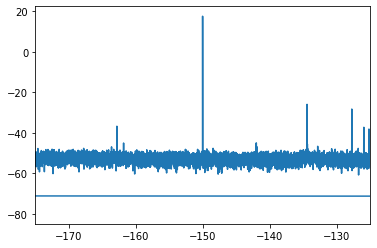

In [32]:
plt.plot(f*1e-6, 10*np.log10(pxx))
plt.xlim([-175,-125])

In [51]:
#Looks like I need a bit more data and a bit more averaging??
S.set_att_uc(0,0)
S.set_att_dc(0,0)
dat = S.read_adc_data(0,data_length=2**24,make_plot=False)


[ 2022-02-15 01:01:51 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:DaqMuxV2[0]:DataBufferSize 16777216
[ 2022-02-15 01:01:51 ]  caput smurf_server_s4:AMCc:FpgaTopLevel:AppTop:AppCore:DebugSelect[0] 0
[ 2022-02-15 01:01:52 ]  Saving raw adc data to /data/smurf_data/20220214/1644882863/outputs/1644886912_adc0


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 16777216 is greater than input length  = 524288, using nperseg = 524288
  .format(nperseg, input_length))


Text(0, 0.5, 'dB')

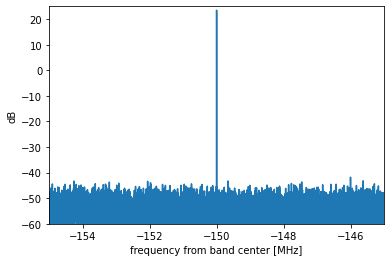

In [62]:
f, pxx = signal.welch(dat, fs=S.get_digitizer_frequency_mhz() * 1e6,nperseg=2**24, return_onesided=False, detrend=False)
plt.plot(f*1e-6, 10*np.log10(pxx))
plt.xlim([-155,-145])
plt.ylim([-60,25])
plt.xlabel('frequency from band center [MHz]')
plt.ylabel('dB')

not totally sure what exactly we want out of this plot but the data are saved and clearly achieve 100dB separation, so I'll leave that for now

### Stuff copied over from Shawn's notebook

Try to fill bands.  Running fill_band.py in my scratch with these settings:

```
amplitude=12
freq_std_khz=100
freq_std_mhz=freq_std_khz/1000.
one_subband_at_a_time=False
wait_btw_subbands_sec=0.1

restrict_nper_band=None
restrict_nper_band=250
```

That should give 250 tones in each band I run it on.


In [8]:
for band in range(8):
    sys.argv[1]=band
    exec(open('/usr/local/src/pysmurf/scratch/shawn/fill_band.py').read())

filling bands 0
-> Restricting nchan to 250.
filling bands 1
-> Restricting nchan to 250.
filling bands 2
-> Restricting nchan to 250.
filling bands 3
-> Restricting nchan to 250.
filling bands 4
-> Restricting nchan to 250.
filling bands 5
-> Restricting nchan to 250.
filling bands 6
-> Restricting nchan to 250.
filling bands 7
-> Restricting nchan to 250.


Here's what that looks like on signal analyzer picked off using a 16 dB coupler (and maybe 4ft cables from SMuRF to in/out of directional coupler, and from directional coupler coupled port to signal analyzer:

In [12]:
for band in range(8):
    print(f'S.get_synthesis_scale({band})={S.get_synthesis_scale(band)}')
    print(f'S.get_att_uc({band})={S.get_att_uc(band)}')
    print(f'S.get_att_dc({band})={S.get_att_dc(band)}')
    print('--------')

S.get_synthesis_scale(0)=1
S.get_att_uc(0)=0
S.get_att_dc(0)=0
--------
S.get_synthesis_scale(1)=1
S.get_att_uc(1)=0
S.get_att_dc(1)=0
--------
S.get_synthesis_scale(2)=1
S.get_att_uc(2)=0
S.get_att_dc(2)=0
--------
S.get_synthesis_scale(3)=1
S.get_att_uc(3)=0
S.get_att_dc(3)=0
--------
S.get_synthesis_scale(4)=1
S.get_att_uc(4)=0
S.get_att_dc(4)=0
--------
S.get_synthesis_scale(5)=1
S.get_att_uc(5)=0
S.get_att_dc(5)=0
--------
S.get_synthesis_scale(6)=1
S.get_att_uc(6)=0
S.get_att_dc(6)=0
--------
S.get_synthesis_scale(7)=1
S.get_att_uc(7)=0
S.get_att_dc(7)=0
--------


Ok so with no attenuation and synthesis scale = 1, I see the following power levels in the signal analyzer near these frequencies;

4.25 GHz : -49 dBm

4.75 GHz : -51 dBm

5.25 GHz : -55 dBm

5.75 GHz : -56 dBm

6.25 GHz : -36 dBm

6.75 GHz : -39 dBm

7.25 GHz : -44 dBm

7.75 GHz : -49 dBm

and the HB noise floor looks kind of weird and wavy.  Let's kick the HB synthesisScale down to 0x2 and see if that helps match.

In [15]:
for band in range(4,8):
    S.set_synthesis_scale(band,0)

Dialing down the synthesis scale makes the waviness go away.  Now for HB we have ; 

6.25 GHz : -42 dBm

6.75 GHz : -45 dBm

7.25 GHz : -50 dBm

7.75 GHz : -55 dBm

Ok so let's try and get the power levels a little better by adjusting attenuators and tone powers.  HB bands 4 and 5 are still like 6dB higher than others.  Let's drop their amplitudes down by 3x.

In [21]:
for band in [4,5]:
    new_asa = np.zeros_like(S.get_amplitude_scale_array(band))
    new_asa[np.where(S.get_amplitude_scale_array(band)==12)]=10
    S.set_amplitude_scale_array(band,new_asa)

That helped a lot with the weird structure I was seeing.  Presumably we were hitting the mixers with too much power?

In [38]:
S.set_att_uc(0,7)
S.set_att_uc(1,4)
S.set_att_uc(2,0)
S.set_att_uc(3,0)

S.set_att_uc(4,10)
S.set_att_uc(5,8)
S.set_att_uc(6,6)